<a href="https://colab.research.google.com/github/Malash99/Oreilly_GAN_Book/blob/main/Chapter_3_Autoencoders_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
from tensorflow.keras import datasets
(x_train , y_train) , (x_test, y_test) = datasets.fashion_mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
def preprocess(imgs) :
  imgs = imgs.astype('float32')/255.0
  imgs = np.pad(imgs,((0,0) , (2,2) , (2,2)) , constant_values= 0.0)
  imgs = np.expand_dims(imgs , -1)
  return imgs
x_train = preprocess(x_train)
x_test = preprocess(x_test)

In [ ]:
from tensorflow.keras.layers import Input
from keras.layers import Input
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model

 # import layers from tensorflow.keras
#first we make the encoder model
encoder_input = layers.Input(
    shape = (32,32,1)  , name = "encoder_input"
)

x = layers.Conv2D(32, (3, 3), strides = 2, activation = 'relu', padding="same")(encoder_input)

x = layers.Conv2D(64, (3, 3), strides = 2, activation = 'relu', padding="same")(x)
x = layers.Conv2D(128, (3, 3), strides = 2, activation = 'relu', padding="same")(x)
shape_before_flattening = K.int_shape(x)[1:]

x = layers.Flatten()(x)

encoder_output = layers.Dense(2, name = "encoder_output")(x)

encoder = Model(encoder_input , encoder_output , name = "encoder")
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)           │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_output (Dense)               │ (None, 2)                   │           4,098 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96,770 (378.01 KB)

 Trainable params: 96,770 (378.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
decoder_input = layers.Input(shape = (2,) , name = "decoder_input")

x = layers.Dense(np.prod(shape_before_flattening))(decoder_input)
x = layers.Reshape(shape_before_flattening)(x)

x = layers.Conv2DTranspose(128, (3, 3), strides = 2, activation = 'relu', padding="same")(x)
x = layers.Conv2DTranspose(64, (3, 3), strides = 2, activation = 'relu', padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides = 2, activation = 'relu', padding="same")(x)

decoder_output = layers.Conv2D(
    1, (3, 3), activation='sigmoid', padding='same', name="decoder_output"
)(x)

decoder = Model(decoder_input , decoder_output , name = "decoder")
decoder.summary()


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)           │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2048)                │           6,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_4 (Conv2DTranspose) │ (None, 16, 16, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_output (Conv2D)              │ (None, 32, 32, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 246,273 (962.00 KB)

 Trainable params: 246,273 (962.00 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# now we merge the encoder with the decoder so we can trani them simultaneously
autoencoder = Model(encoder_input , decoder(encoder_output))

In [23]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [31]:
#training the AUTOENCODER ON TRAINING DATA
#training the AUTOENCODER ON TRAINING DATA
!pip install tensorflow # install tensorflow
import tensorflow as tf # import tensorflow
autoencoder(tf.zeros((1, 32, 32, 1))) # Pass a dummy input to build the model

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(
      x_train,
      x_train,
      epochs=5,
      batch_size=100,
      shuffle=True,
      validation_data=(x_test, x_test)
  )

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 268s 441ms/step - loss: 0.3646 - val_loss: 0.2644
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 327s 449ms/step - loss: 0.2614 - val_loss: 0.2581
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 300s 413ms/step - loss: 0.2558 - val_loss: 0.2554
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 253s 398ms/step - loss: 0.2531 - val_loss: 0.2537
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 261s 397ms/step - loss: 0.2518 - val_loss: 0.2536


In [32]:
example_images = x_test[:500]

predictions = autoencoder.predict(example_images)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


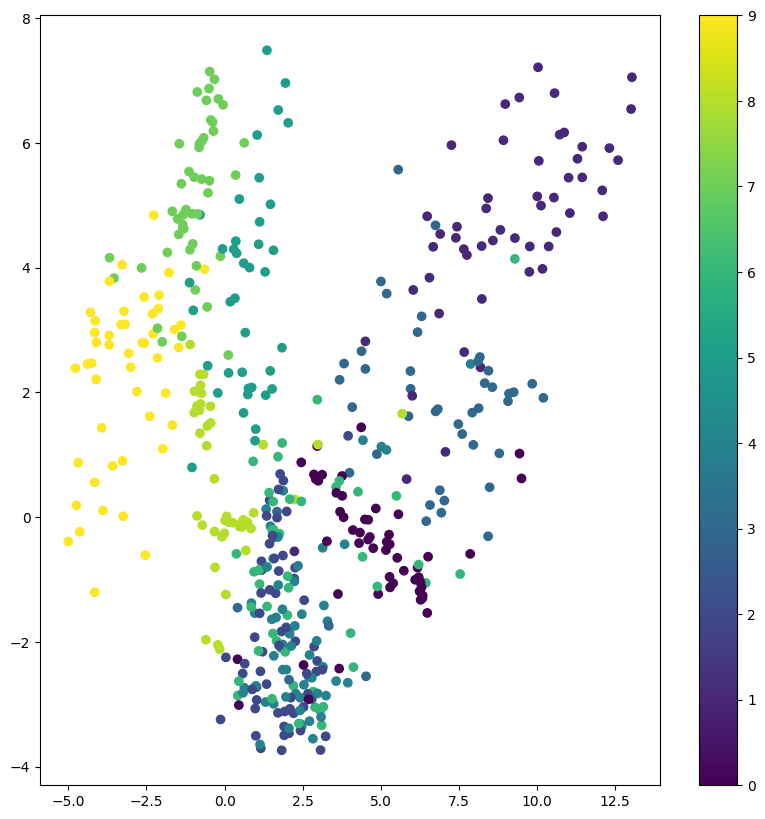

In [34]:
embeddings = encoder.predict(example_images)
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 10))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=y_test[:500])
plt.colorbar()
plt.show()

In [36]:
mins , max  = np.min(embeddings , axis=0) , np.max(embeddings, axis=0)
sample = np.random.uniform(mins , max , size=(18,2))

reconstructions = decoder.predict(sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


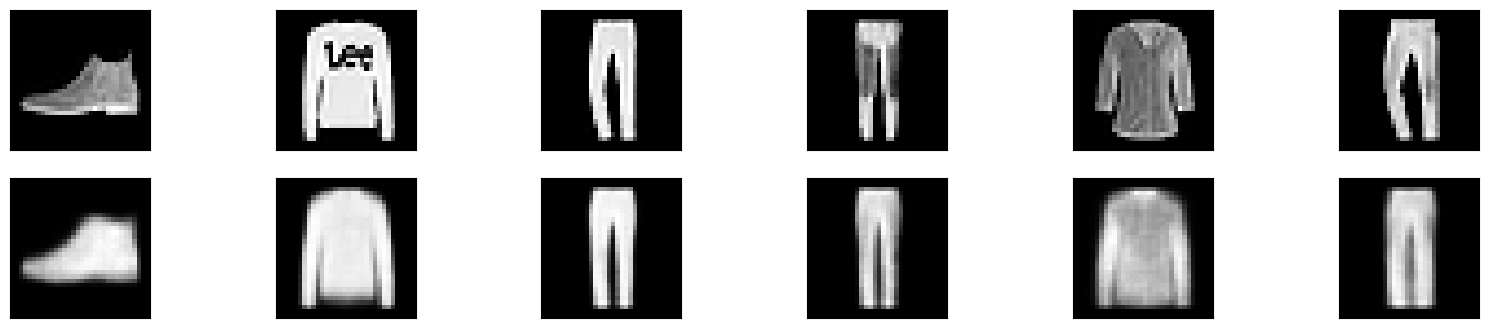

In [37]:
# prompt: plot reconstruction

import matplotlib.pyplot as plt

n = 6
plt.figure(figsize=(20, 4))
for i in range(n):
  # Display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(example_images[i].reshape(32, 32))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(predictions[i].reshape(32, 32))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
